Credit Risk Dataset\
kaggle: https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data

About Dataset
Feature Descriptions:

* person_age: Age
* person_income: Annual Income
* person_home_ownership: Home ownership
* person_emp_length: Employment length (in years)
* loan_intent: Loan intent
* loan_grade: Loan grade
* loan_amnt: Loan amount
* loan_int_rate: Interest rate
* loan_status: Loan status (0 is non default 1 is default)
* loan_percent_income: Percent income
* cb_person_default_on_file: Historical default
* cb_person_cred_hist_length: Credit history length




# Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning library
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# metric
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [ ]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
print(df.shape)
df.isna().sum()

(32581, 12)


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


Dataset is NaN values\
I replace NaN values with the mean of each column.

In [ ]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].mean())
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


The dataset contains string data, which can't be used to train machine learning models, so I replace the string data with numerical values. \
Columns have string data
* person_home_ownership
* loan_intent
* loan_grade
* cb_person_default_on_file

In [ ]:
df['person_home_ownership'] = df['person_home_ownership'].map({'RENT':1, 'MORTGAGE':2, 'OWN':3, 'OTHER':4})
df['loan_grade'] = df['loan_grade'].map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7})
df['loan_intent'] = df['loan_intent'].map({'PERSONAL':1, 'MEDICAL':2, 'EDUCATION':3, 'VENTURE':4, 'HOMEIMPROVEMENT':5, 'DEBTCONSOLIDATION':6})
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'N':0, 'Y':1})
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,1,123.0,1,4,35000,16.02,1,0.59,1,3
1,21,9600,3,5.0,3,2,1000,11.14,0,0.10,0,2
2,25,9600,2,1.0,2,3,5500,12.87,1,0.57,0,3
3,23,65500,1,4.0,2,3,35000,15.23,1,0.53,0,2
4,24,54400,1,8.0,2,3,35000,14.27,1,0.55,1,4


In [ ]:
X = df.drop('loan_status', axis=1)
Y = df[['loan_status']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("x_train_shape:", x_train.shape)
print("y_train_shape:", y_train.shape)
print("x_test_shape:", x_test.shape)
print("y_test_shape:", y_test.shape)

x_train_shape: (26064, 11)
y_train_shape: (26064, 1)
x_test_shape: (6517, 11)
y_test_shape: (6517, 1)


# Model Training

In [ ]:
# Create and fitting model
rf = RandomForestClassifier().fit(x_train, y_train)
lgr = LogisticRegression().fit(x_train, y_train)
dt = DecisionTreeClassifier().fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

In [ ]:
# Predict loan status with test set
rf_pred = rf.predict(x_test)
lgr_pred = lgr.predict(x_test)
dt_pred = dt.predict(x_test)

# metric
accuracy_rf = accuracy_score(y_test, rf_pred)
accuracy_lgr = accuracy_score(y_test, lgr_pred)
accuracy_dt = accuracy_score(y_test, dt_pred)

f1_rf = f1_score(y_test, rf_pred)
f1_lgr = f1_score(y_test, lgr_pred)
f1_dt = f1_score(y_test, dt_pred)

precision_rf = precision_score(y_test, rf_pred)
precision_lgr = precision_score(y_test, lgr_pred)
precision_dt = precision_score(y_test, dt_pred)

recall_rf = recall_score(y_test, rf_pred)
recall_lgr = recall_score(y_test, lgr_pred)
recall_dt = recall_score(y_test, dt_pred)

df_result = pd.DataFrame({'Model':['Random Forest', 'Logistic Regression', 'Decision Tree'],
                          'Accuracy':[accuracy_rf, accuracy_lgr, accuracy_dt],
                          'F1 Score':[f1_rf, f1_lgr, f1_dt],
                          'Precision':[precision_rf, precision_lgr, precision_dt],
                          'Recall':[recall_rf, recall_lgr, recall_dt]})

In [ ]:
df_result

,Model,Accuracy,F1 Score,Precision,Recall
0,Random Forest,0.929569,0.817640,0.959888,0.712111
1,Logistic Regression,0.822771,0.455959,0.713864,0.334948
2,Decision Tree,0.891668,0.760027,0.746827,0.773702


# Feature importance with the best model

<Axes: xlabel='Importance', ylabel='Feature'>

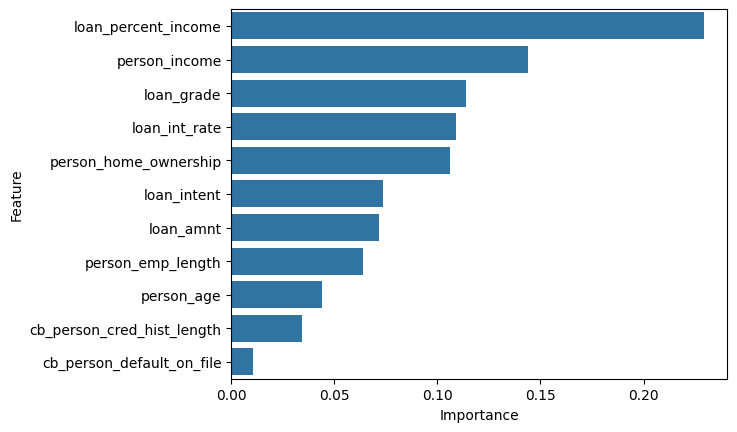

In [ ]:
importances = rf.feature_importances_
df_feature_importance = pd.DataFrame({'Feature':x_train.columns, 'Importance':importances})
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=df_feature_importance)

Text(0.5, 1.0, 'Confusion Matrix')

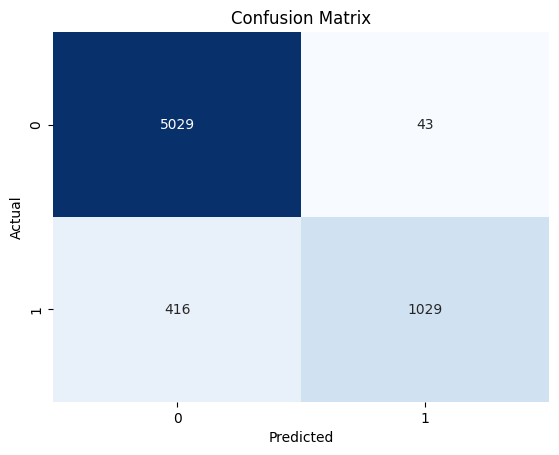

In [ ]:
# Create Confustion matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add lable
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')